In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
Numpy: 1.18.0
Matplotlib: 3.1.2
Pandas: 0.25.3
sklearn: 0.22.1


In [74]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [75]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin.data"
df = pd.read_csv("breast-cancer-wisconsin.csv",names = names)

names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']



In [76]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [77]:
df.replace('?',-99999,inplace = True)
df.drop(['id'],1,inplace = True)

In [78]:
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [79]:
print(df.shape)

(699, 10)


In [80]:
df.tail()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4
698,4,8,8,5,4,5,10,4,1,4


In [81]:
print(df.loc[0])

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object


In [82]:
print(df.describe())

       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   


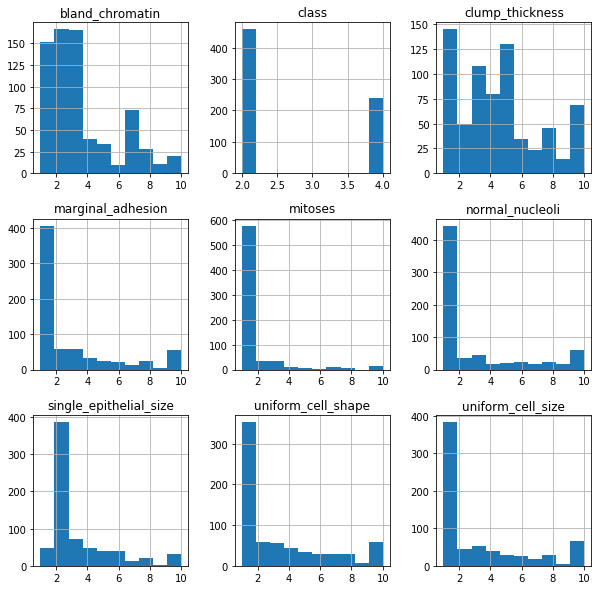

In [83]:
# Plot histograms for each variable
df.hist(figsize=(10,10))
plt.show()

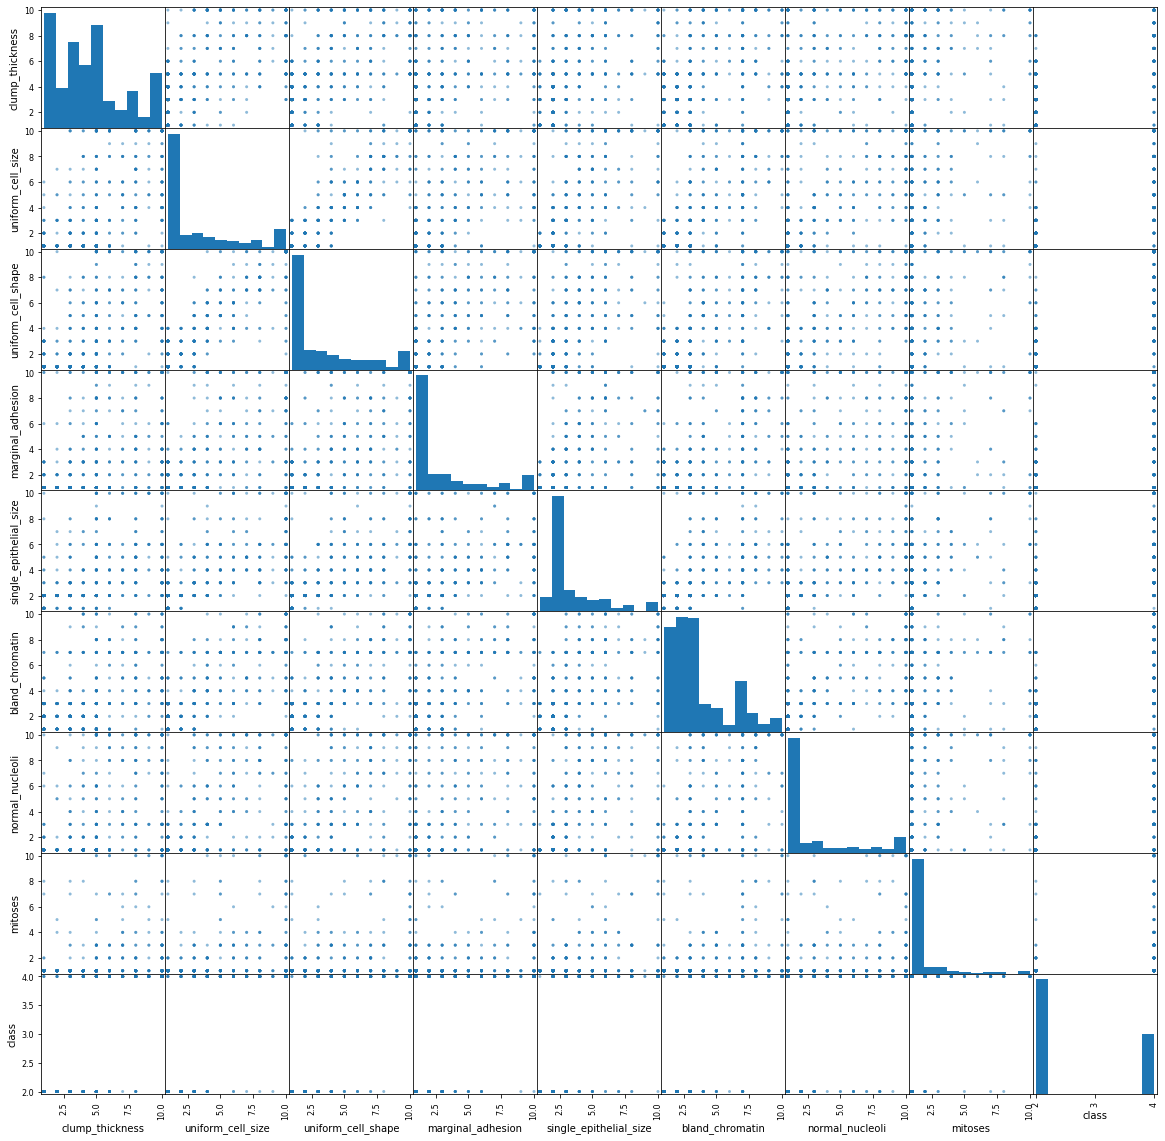

In [84]:
scatter_matrix(df,figsize = (20,20))
plt.show()

In [86]:
# Create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [87]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [89]:
#Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC()))

#Evaluate each model in turn
results = []
names = []

for name , model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.974968 (0.027886)
SVM: 0.665552 (0.058849)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [92]:
#Make predictions on validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.95
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        86
           4       0.94      0.93      0.93        54

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140

SVM
0.6142857142857143
              precision    recall  f1-score   support

           2       0.61      1.00      0.76        86
           4       0.00      0.00      0.00        54

    accuracy                           0.61       140
   macro avg       0.31      0.50      0.38       140
weighted avg       0.38      0.61      0.47       140



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,1]])
example = example_measures.reshape(len(example), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.6142857142857143
[2]
